    user_id    item_id  behavior_type user_geohash  item_category  \
0  10001082  285259775              1      97lk14c           4076   
1  10001082    4368907              1          NaN           5503   
2  10001082    4368907              1          NaN           5503   
3  10001082   53616768              1          NaN           9762   
4  10001082  151466952              1          NaN           5232   

            time  
0  2014-12-08 18  
1  2014-12-12 12  
2  2014-12-12 12  
3  2014-12-02 15  
4  2014-12-12 11  
1    9421870
3     285007
2     193766
4      99357
Name: behavior_type, dtype: int64
            user_id    item_id  behavior_type user_geohash  item_category  \
10000000  123265349  125559152              1      94h6g01          13712   
10000001  123265349  222706509              1          NaN          14079   
10000002  123265349  206001417              1      94h6g0q          13712   
10000003  123265349  380984190              1      94h6g1d           2825   


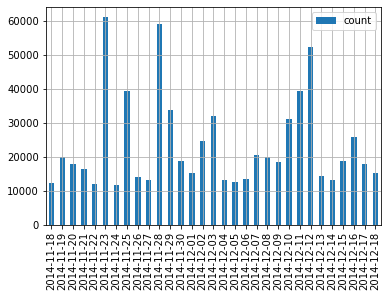

{'2014-12-12 00': [11301, 156, 562, 540], '2014-12-12 01': [5208, 74, 160, 127], '2014-12-12 02': [2770, 45, 73, 75], '2014-12-12 03': [1739, 25, 52, 28], '2014-12-12 04': [1183, 8, 23, 19], '2014-12-12 05': [1408, 22, 57, 9], '2014-12-12 06': [3975, 44, 168, 96], '2014-12-12 07': [5162, 78, 163, 129], '2014-12-12 08': [6803, 177, 280, 192], '2014-12-12 09': [8016, 97, 286, 232], '2014-12-12 10': [8586, 129, 383, 235], '2014-12-12 11': [7785, 111, 311, 230], '2014-12-12 12': [7943, 132, 238, 189], '2014-12-12 13': [9183, 126, 350, 211], '2014-12-12 14': [7545, 147, 265, 141], '2014-12-12 15': [7278, 99, 279, 143], '2014-12-12 16': [6737, 169, 278, 149], '2014-12-12 17': [5231, 209, 203, 115], '2014-12-12 18': [6531, 240, 206, 117], '2014-12-12 19': [8921, 141, 314, 151], '2014-12-12 20': [11274, 190, 335, 170], '2014-12-12 21': [14171, 209, 417, 239], '2014-12-12 22': [12408, 174, 416, 204], '2014-12-12 23': [11372, 168, 534, 277]}


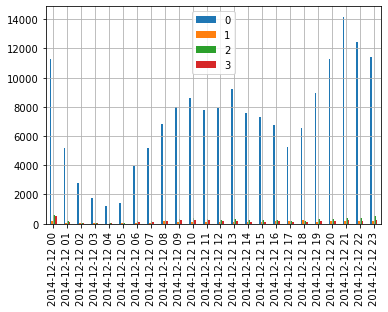

In [18]:

import pandas as pd 


from collections import defaultdict
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import gc


#CVR的计算， 分成1O00W一批次去计算
count_all, count_4= 0, 0
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')

for df in pd.read_csv(open('./tianchi_fresh_comp_train_user.csv','r'),
                      chunksize = 10000000):
    print(df.head())
    print(df['behavior_type'].value_counts())
    count_user = df['behavior_type'].value_counts()
    count_all += count_user[1] +count_user[2] +count_user[3]+count_user[4]
    count_4 +=count_user[4]
    del df
    gc.collect()


cvr = count_4/count_all
print('CVR={}%'.format(cvr*100))


##31天周期的总数的趋势， 分成1O00W一批次去计算
count_day = []
df_p = pd.read_csv('./tianchi_fresh_comp_train_item.csv')

for df in pd.read_csv(open('./tianchi_fresh_comp_train_user.csv','r'),
                      chunksize = 10000000):
    
    df['time'] = pd.to_datetime(df['time'])
    df.index = df['time']
    df = pd.merge(df, df_p, on=['item_id']).set_index('time')
    
    count_day = defaultdict(int)
    str1 = '2014-11-17'
    temp_date = datetime.strptime(str1, '%Y-%m-%d')
    delta = timedelta(days=1)
    for i in range(31):
        temp_date = temp_date + delta
        temp_str = temp_date.strftime('%Y-%m-%d')
        count_day[temp_str] += df[temp_str].shape[0]
    print(count_day)
    del df
    gc.collect()

    
def show_count_day(count_day):    
    df_count_day = pd.DataFrame.from_dict(count_day , orient= 'index', columns=['count'])
    df_count_day['count'].plot(kind= 'bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

show_count_day(count_day)


#1天24个小时的总数的趋势，分成1O00W一批次去计算
def show_count_hour(date1):
    count_hour = {}
    for df in pd.read_csv(open('./tianchi_fresh_comp_train_user.csv','r'),
                      chunksize = 10000000):
        df['time'] = pd.to_datetime(df['time'])
        df.index = df['time']
        for i in range(24):
            time_str = date1 + ' %02.d' % i
            count_hour[time_str] = [0,0,0,0]

            temp = df[time_str]['behavior_type'].value_counts()
            for j in range(len(temp)):
                count_hour[time_str][temp.index[j]-1] += temp[temp.index[j]]
        del df
        gc.collect()
    
    print(count_hour)
    df_count_hour = pd.DataFrame.from_dict(count_hour, orient='index')
    df_count_hour.plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)

    
show_count_hour('2014-12-12')
